In [1]:
import keras

% pylab inline

/home/soph/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = keras.layers.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = keras.layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = keras.layers.Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = keras.models.Model(input_img, decoded)

In [3]:
# this model maps an input to its encoded representation
encoder = keras.models.Model(input_img, encoded)

In [4]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = keras.layers.Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = keras.models.Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='nadam', loss='binary_crossentropy')

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [21]:
callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        factor=.5, patience=1, verbose=1, min_lr=1e-6),
    keras.callbacks.EarlyStopping(patience=5, verbose=1, min_delta=0.0001)
]

In [9]:
autoencoder.fit(x_train, x_train, batch_size=256,
                epochs=50,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=callbacks
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.2241 - val_loss: 0.1560
Epoch 2/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.1385 - val_loss: 0.1247
Epoch 3/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.1176 - val_loss: 0.1102
Epoch 4/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.1077 - val_loss: 0.1031
Epoch 5/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.1024 - val_loss: 0.0993
Epoch 6/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.0992 - val_loss: 0.0970
Epoch 7/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0976 - val_loss: 0.0966
Epoch 8/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0965 - val_loss: 0.0947
Epoch 9/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0954 - val_loss: 0.0937
Epoch

In [10]:
input_img = keras.layers.Input(shape=(784,))
encoded = keras.layers.Dense(128, activation='relu')(input_img)
encoded = keras.layers.Dense(64, activation='relu')(encoded)
encoded = keras.layers.Dense(32, activation='relu')(encoded)

decoded = keras.layers.Dense(64, activation='relu')(encoded)
decoded = keras.layers.Dense(128, activation='relu')(decoded)
decoded = keras.layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='nadam', loss='binary_crossentropy')

In [11]:
autoencoder.fit(x_train, x_train, batch_size=256,
                epochs=100,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=callbacks
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.2083 - val_loss: 0.1605
Epoch 2/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.1497 - val_loss: 0.1508
Epoch 3/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1351 - val_loss: 0.1266
Epoch 4/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.1263 - val_loss: 0.1219
Epoch 5/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.1200 - val_loss: 0.1126
Epoch 6/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.1152 - val_loss: 0.1120
Epoch 7/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.1117 - val_loss: 0.1110
Epoch 8/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.1088 - val_loss: 0.1082
Epoch 9/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.1065 - val_loss: 0.1

60000/60000 [==============================] - 2s 27us/step - loss: 0.0795 - val_loss: 0.0795
Epoch 71/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.0795 - val_loss: 0.0795

Epoch 00071: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.
Epoch 72/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.0795 - val_loss: 0.0795
Epoch 73/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.0795 - val_loss: 0.0795

Epoch 00073: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.
Epoch 74/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.0795 - val_loss: 0.0795
Epoch 75/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.0795 - val_loss: 0.0795

Epoch 00075: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.
Epoch 76/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.0795 - val_loss: 0.0795
Epoch 77/100
60000/6

<Figure size 1440x288 with 0 Axes>

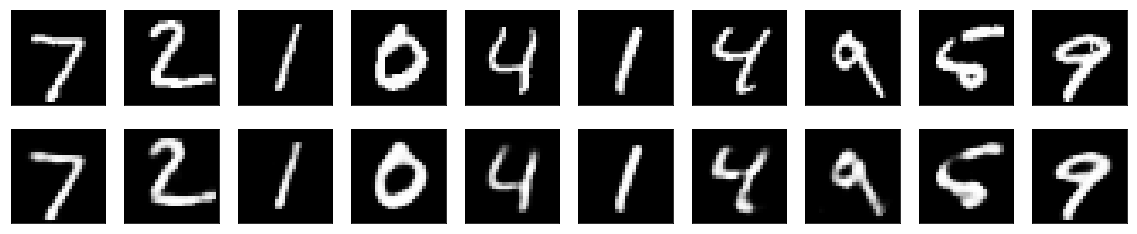

In [12]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))

fig, axes = plt.subplots(nrows=2, ncols=n, figsize=(20,4))
for i in range(n):
    # display original
    ax = axes[0,i]
    ax.imshow(x_test[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = axes[1,i]
    ax.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [17]:
input_img = keras.layers.Input(
    shape=(28, 28,
           1))  # adapt this if using `channels_first` image data format

x = keras.layers.Conv2D(
    16, (3, 3), activation='elu', padding='same')(input_img)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = keras.layers.Conv2D(16, (3, 3), activation='elu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = keras.layers.Conv2D(16, (3, 3), activation='elu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = keras.layers.Conv2D(16, (3, 3), activation='elu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = keras.layers.Conv2D(32, (3, 3), activation='elu', padding='same')(x)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (1, 1, 32) i.e. 128-dimensional

x = keras.layers.Conv2DTranspose(
    32, (3, 3), strides=(2, 2), activation="elu", padding='valid')(encoded)
x = keras.layers.Conv2D(16, (3, 3), activation='elu', padding='same')(x)

x = keras.layers.Conv2DTranspose(
    16, (3, 3), strides=(2, 2), activation="elu", padding='valid')(x)
x = keras.layers.Conv2D(16, (3, 3), activation='elu', padding='same')(x)

x = keras.layers.Conv2DTranspose(
    16, (3, 3), strides=(2, 2), activation="elu", padding='same')(x)
x = keras.layers.Conv2D(16, (3, 3), activation='elu', padding='same')(x)

x = keras.layers.Conv2DTranspose(
    16, (3, 3), strides=(2, 2), activation="elu", padding='same')(x)
x = keras.layers.Conv2D(16, (3, 3), activation='elu', padding='same')(x)

decoded = keras.layers.Conv2D(
    1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.models.Model(input_img, decoded)

autoencoder.summary()

autoencoder.compile(optimizer='nadam', loss='binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 16)          2320      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 16)          0         
__________

In [18]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [19]:
autoencoder.fit(x_train, x_train, batch_size=256,
                epochs=100,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=callbacks
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 111us/step - loss: 0.2418 - val_loss: 0.1770
Epoch 2/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.1530 - val_loss: 0.1464
Epoch 3/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.1314 - val_loss: 0.1283
Epoch 4/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.1208 - val_loss: 0.1155
Epoch 5/100
60000/60000 [==============================] - 6s 92us/step - loss: 0.1136 - val_loss: 0.1116
Epoch 6/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.1082 - val_loss: 0.1073
Epoch 7/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.1047 - val_loss: 0.1013
Epoch 8/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.1016 - val_loss: 0.0992
Epoch 9/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.0990 - val_loss: 0.

60000/60000 [==============================] - 5s 91us/step - loss: 0.0768 - val_loss: 0.0763
Epoch 67/100
60000/60000 [==============================] - 5s 92us/step - loss: 0.0768 - val_loss: 0.0763

Epoch 00067: ReduceLROnPlateau reducing learning rate to 3.051757957450718e-08.
Epoch 68/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.0768 - val_loss: 0.0763
Epoch 69/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.0768 - val_loss: 0.0763

Epoch 00069: ReduceLROnPlateau reducing learning rate to 1.525878978725359e-08.
Epoch 70/100
60000/60000 [==============================] - 5s 92us/step - loss: 0.0768 - val_loss: 0.0763
Epoch 71/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.0768 - val_loss: 0.0763

Epoch 00071: ReduceLROnPlateau reducing learning rate to 1e-08.
Epoch 72/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.0768 - val_loss: 0.0763
Epoch 73/100
60000/60000 [===========

KeyboardInterrupt: 

<Figure size 1440x288 with 0 Axes>

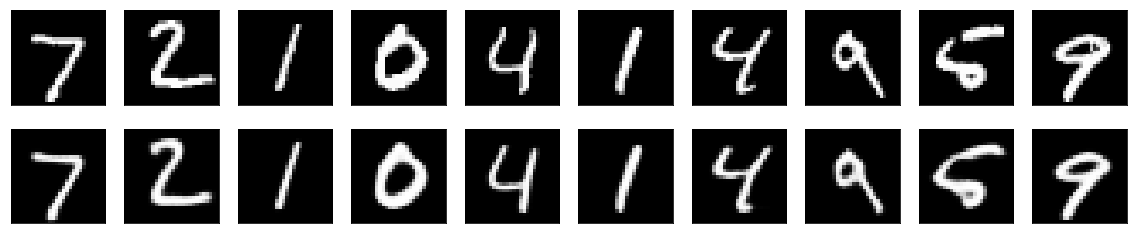

In [20]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))

fig, axes = plt.subplots(nrows=2, ncols=n, figsize=(20,4))
for i in range(n):
    # display original
    ax = axes[0,i]
    ax.imshow(x_test[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = axes[1,i]
    ax.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [37]:
STD = .3

In [38]:
input_img = keras.layers.Input(
    shape=(28, 28,
           1))  # adapt this if using `channels_first` image data format

x = keras.layers.GaussianNoise(STD)(input_img)

x = keras.layers.Conv2D(
    16, (3, 3), activation='elu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = keras.layers.Conv2D(16, (3, 3), activation='elu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = keras.layers.Conv2D(16, (3, 3), activation='elu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = keras.layers.Conv2D(16, (3, 3), activation='elu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = keras.layers.Conv2D(32, (3, 3), activation='elu', padding='same')(x)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (1, 1, 32) i.e. 128-dimensional

x = keras.layers.Conv2DTranspose(
    32, (3, 3), strides=(2, 2), activation="elu", padding='valid')(encoded)
x = keras.layers.Conv2D(16, (3, 3), activation='elu', padding='same')(x)

x = keras.layers.Conv2DTranspose(
    16, (3, 3), strides=(2, 2), activation="elu", padding='valid')(x)
x = keras.layers.Conv2D(16, (3, 3), activation='elu', padding='same')(x)

x = keras.layers.Conv2DTranspose(
    16, (3, 3), strides=(2, 2), activation="elu", padding='same')(x)
x = keras.layers.Conv2D(16, (3, 3), activation='elu', padding='same')(x)

x = keras.layers.Conv2DTranspose(
    16, (3, 3), strides=(2, 2), activation="elu", padding='same')(x)
x = keras.layers.Conv2D(16, (3, 3), activation='elu', padding='same')(x)

decoded = keras.layers.Conv2D(
    1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.models.Model(input_img, decoded)

autoencoder.summary()

autoencoder.compile(optimizer='nadam', loss='binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
gaussian_noise_4 (GaussianNo (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 7, 7, 16)          2320      
__________

In [39]:
x_test_noise = x_test + np.random.normal(scale=STD, size=x_test.shape)

In [40]:
autoencoder.fit(x_train, x_train, batch_size=256,
                epochs=100,
                shuffle=True,
                validation_data=(x_test_noise, x_test),
                callbacks=callbacks
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 117us/step - loss: 0.2377 - val_loss: 0.1751
Epoch 2/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.1597 - val_loss: 0.1469
Epoch 3/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.1398 - val_loss: 0.1400
Epoch 4/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.1294 - val_loss: 0.1223
Epoch 5/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.1225 - val_loss: 0.1223
Epoch 6/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.1176 - val_loss: 0.1140
Epoch 7/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.1142 - val_loss: 0.1148
Epoch 8/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.1112 - val_loss: 0.1118
Epoch 9/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.1088 - val_loss: 0.

<Figure size 1440x288 with 0 Axes>

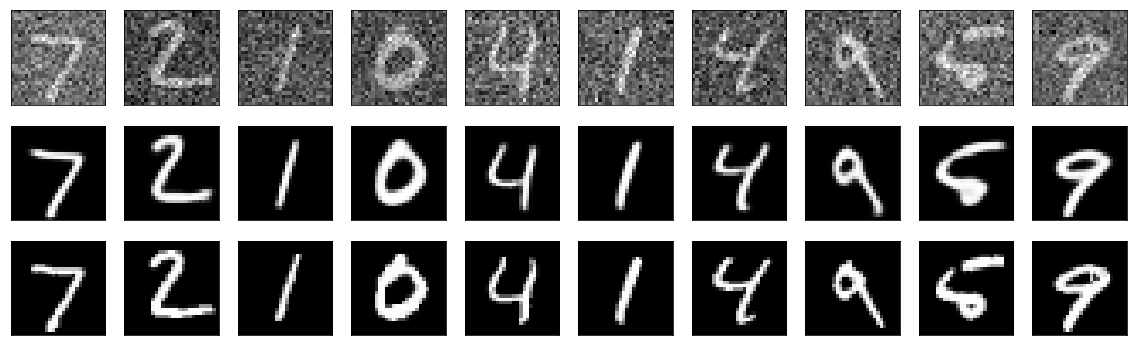

In [41]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))

fig, axes = plt.subplots(nrows=3, ncols=n, figsize=(20,6))
for i in range(n):
    # display input
    ax = axes[0,i]
    ax.imshow(x_test_noise[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = axes[1,i]
    ax.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display original
    ax = axes[2,i]
    ax.imshow(x_test[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [42]:
(x_train, _), (x_test, _) = keras.datasets.cifar100.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train.shape

(50000, 32, 32, 3)

In [44]:
np.std(x_train, axis=(1,2,3)).mean()

0.21646152

In [65]:
STD = .1

x_test_noise = x_test + np.random.normal(scale=STD, size=x_test.shape)

In [60]:
input_img = keras.layers.Input(
    shape=(32, 32,
           3))  # adapt this if using `channels_first` image data format

x = keras.layers.GaussianNoise(STD)(input_img)

x = keras.layers.Conv2D(
    16, (3, 3), activation='elu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Conv2D(16, (3, 3), activation='elu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = keras.layers.Conv2D(32, (3, 3), activation='elu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = keras.layers.Conv2D(64, (3, 3), activation='elu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = keras.layers.Conv2D(128, (3, 3), activation='elu', padding='same')(x)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (1, 1, 32) i.e. 128-dimensional

x = keras.layers.Conv2DTranspose(
    128, (3, 3), strides=(2, 2), activation="elu", padding='same')(encoded)
x = keras.layers.Conv2D(128, (3, 3), activation='elu', padding='same')(x)

x = keras.layers.Conv2DTranspose(
    64, (3, 3), strides=(2, 2), activation="elu", padding='same')(x)
x = keras.layers.Conv2D(64, (3, 3), activation='elu', padding='same')(x)

x = keras.layers.Conv2DTranspose(
    32, (3, 3), strides=(2, 2), activation="elu", padding='same')(x)
x = keras.layers.Conv2D(32, (3, 3), activation='elu', padding='same')(x)

x = keras.layers.Conv2DTranspose(
    16, (3, 3), strides=(2, 2), activation="elu", padding='same')(x)
x = keras.layers.Conv2D(16, (3, 3), activation='elu', padding='same')(x)

x = keras.layers.Conv2DTranspose(
    16, (3, 3), strides=(2, 2), activation="elu", padding='same')(x)
x = keras.layers.Conv2D(16, (3, 3), activation='elu', padding='same')(x)

x = keras.layers.BatchNormalization()(x)

decoded = keras.layers.Conv2D(
    3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.models.Model(input_img, decoded)

autoencoder.summary()

autoencoder.compile(optimizer='nadam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, batch_size=256,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noise, x_test),
                callbacks=callbacks
               )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
gaussian_noise_12 (GaussianN (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_133 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 16, 16)        64        
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 16, 16, 16)        2320      
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 8, 8, 16)          0         
__________

In [69]:
import keras.backend as K

In [81]:
input_img = keras.layers.Input(
    shape=(32, 32,
           3))  # adapt this if using `channels_first` image data format

x = keras.layers.GaussianNoise(STD)(input_img)

enc_32 = keras.layers.Conv2D(
    64, (3, 3), activation='elu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(enc_32)
x = keras.layers.BatchNormalization()(x)

enc_16 = keras.layers.Conv2D(64, (3, 3), activation='elu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(enc_16)

enc_8 = keras.layers.Conv2D(64, (3, 3), activation='elu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(enc_8)

enc_4 = keras.layers.Conv2D(64, (3, 3), activation='elu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(enc_4)

enc_2 = keras.layers.Conv2D(256, (3, 3), activation='elu', padding='same')(x)
# encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (1, 1, 32) i.e. 128-dimensional

# x = keras.layers.Conv2DTranspose(
#     128, (3, 3), strides=(2, 2), activation="elu", padding='same')(encoded)
# x = keras.layers.SeparableConv2D(128, (3, 3), activation='elu', padding='same')(x)

dec_4 = keras.layers.Conv2DTranspose(
    64, (3, 3), strides=(2, 2), activation="elu", padding='same')(enc_2)
comb_4 = keras.layers.Concatenate(axis=3)( [dec_4,enc_4] )
x = keras.layers.Conv2D(128, (3, 3), activation='elu', padding='same')(comb_4)

dec_8 = keras.layers.Conv2DTranspose(
    64, (3, 3), strides=(2, 2), activation="elu", padding='same')(x)
comb_8 = keras.layers.Concatenate(axis=3)( [dec_8,enc_8] )
x = keras.layers.Conv2D(128, (3, 3), activation='elu', padding='same')(comb_8)

dec_16 = keras.layers.Conv2DTranspose(
    64, (3, 3), strides=(2, 2), activation="elu", padding='same')(x)
comb_16 = keras.layers.Concatenate(axis=3)( [dec_16,enc_16] )
x = keras.layers.Conv2D(128, (3, 3), activation='elu', padding='same')(comb_16)

dec_32 = keras.layers.Conv2DTranspose(
    64, (3, 3), strides=(2, 2), activation="elu", padding='same')(x)
comb_32 = keras.layers.Concatenate(axis=3)( [dec_32,enc_32] )
x = keras.layers.Conv2D(64, (3, 3), activation='elu', padding='same')(comb_32)

x = keras.layers.BatchNormalization()(x)

decoded = keras.layers.Conv2D(
    3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.models.Model(input_img, decoded)

autoencoder.summary(line_length=100)

autoencoder.compile(optimizer='nadam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, batch_size=256,
                epochs=100,
                shuffle=True,
                validation_data=(x_test_noise, x_test),
                callbacks=callbacks
               )

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_35 (InputLayer)            (None, 32, 32, 3)     0                                            
____________________________________________________________________________________________________
gaussian_noise_30 (GaussianNoise (None, 32, 32, 3)     0           input_35[0][0]                   
____________________________________________________________________________________________________
conv2d_242 (Conv2D)              (None, 32, 32, 64)    1792        gaussian_noise_30[0][0]          
____________________________________________________________________________________________________
max_pooling2d_141 (MaxPooling2D) (None, 16, 16, 64)    0           conv2d_242[0][0]                 
___________________________________________________________________________________________

50000/50000 [==============================] - 20s 406us/step - loss: 0.5293 - val_loss: 0.5280
Epoch 17/100
50000/50000 [==============================] - 20s 408us/step - loss: 0.5293 - val_loss: 0.5281
Epoch 18/100
50000/50000 [==============================] - 20s 408us/step - loss: 0.5293 - val_loss: 0.5281

Epoch 00018: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 19/100
50000/50000 [==============================] - 20s 408us/step - loss: 0.5293 - val_loss: 0.5281

Epoch 00019: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 20/100
50000/50000 [==============================] - 20s 408us/step - loss: 0.5293 - val_loss: 0.5280

Epoch 00020: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
Epoch 21/100
50000/50000 [==============================] - 20s 407us/step - loss: 0.5293 - val_loss: 0.5280

Epoch 00021: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
Epoch 00021: early stopping


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<Figure size 1440x288 with 0 Axes>

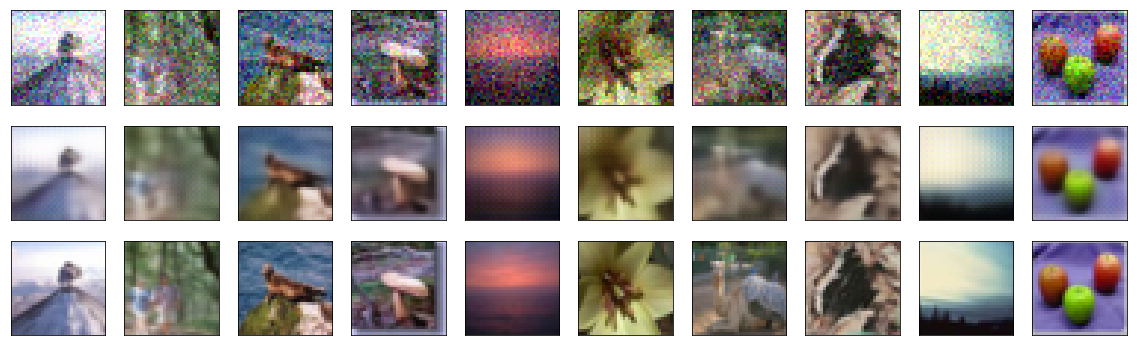

In [82]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))

fig, axes = plt.subplots(nrows=3, ncols=n, figsize=(20,6))
for i in range(n):
    # display input
    ax = axes[0,i]
    ax.imshow(x_test_noise[i].reshape(32, 32,3), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = axes[1,i]
    ax.imshow(decoded_imgs[i].reshape(32, 32,3), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display original
    ax = axes[2,i]
    ax.imshow(x_test[i].reshape(32, 32,3), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()